# What are the most demanded skills for the top 3 most popular data roles?
# Methodology
## 1.Clean-up skill column
## 2.Calculate skill count based on job_title_short
## 3.Calculate skill percentage
## 4.Plot final findings

In [2]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
df_US=df[df['job_country']=='United States']


In [5]:
df_skills=df_US.explode('job_skills')

In [7]:
df_skills[['job_title','job_skills']]

,job_title,job_skills
0,Senior Clinical Data Engineer / Principal Clin...,None
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,python
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,c++
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,java
3,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,matlab
...,...,...
785692,Data Scientist- Hybrid Work Location,r
785703,Data Analyst - CRYPTOGRAPHY - Full-time,None
785705,Expert Business Data Analyst - Now Hiring,sql
785705,Expert Business Data Analyst - Now Hiring,python


In [11]:
df_skills_count=df_skills.groupby(['job_skills','job_title_short']).size()

type(df_skills_count)

pandas.core.series.Series

In [ ]:
df_skills_count=df_skills_count.reset_index(name='skill_count')



In [17]:
df_skills_count.sort_values(by='skill_count',ascending=False,inplace=True)

In [18]:
df_skills_count

,job_skills,job_title_short,skill_count
1209,python,Data Scientist,42379
1521,sql,Data Analyst,34452
1523,sql,Data Scientist,30034
455,excel,Data Analyst,27519
1243,r,Data Scientist,26022
...,...,...,...
553,gdpr,Software Engineer,1
554,ggplot2,Business Analyst,1
1843,wrike,Business Analyst,1
1839,workfront,Data Engineer,1


In [24]:
job_titles=df_skills_count['job_title_short'].unique().tolist()
job_titles=sorted(job_titles[:3])
job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

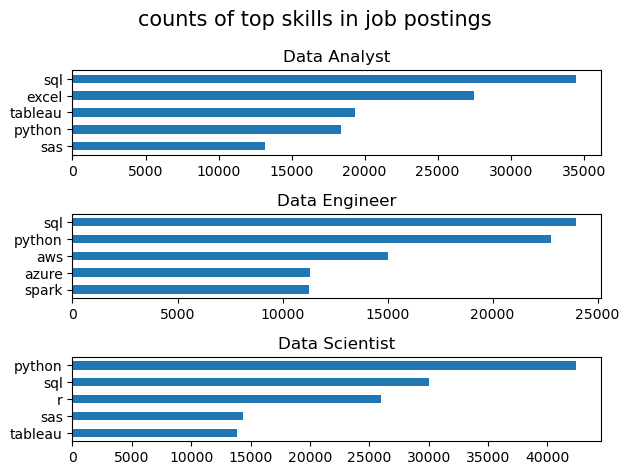

In [31]:
fig,ax=plt.subplots(len(job_titles),1)


for i ,job_title in enumerate(job_titles):
  df_plot=df_skills_count[df_skills_count['job_title_short']== job_title].head(5)
  df_plot.plot(kind='barh',x='job_skills',y='skill_count',ax=ax[i],title=job_title)
  ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].legend().set_visible(False)


fig.suptitle('counts of top skills in job postings',fontsize=15)
fig.tight_layout()
plt.show()


In [33]:
df_job_title_count=df_US['job_title_short'].value_counts().reset_index(name='jobs_total')

In [36]:
df_skills_perc=pd.merge(df_skills_count,df_job_title_count, how='left',on='job_title_short')

In [39]:
df_skills_perc['skill_percent']=100*df_skills_perc['skill_count']/df_skills_perc['jobs_total']
df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,python,Data Scientist,42379,58830,72.036376
1,sql,Data Analyst,34452,67816,50.802171
2,sql,Data Scientist,30034,58830,51.052184
3,excel,Data Analyst,27519,67816,40.578919
4,r,Data Scientist,26022,58830,44.232534
...,...,...,...,...,...
1865,gdpr,Software Engineer,1,1814,0.055127
1866,ggplot2,Business Analyst,1,7382,0.013546
1867,wrike,Business Analyst,1,7382,0.013546
1868,workfront,Data Engineer,1,35080,0.002851


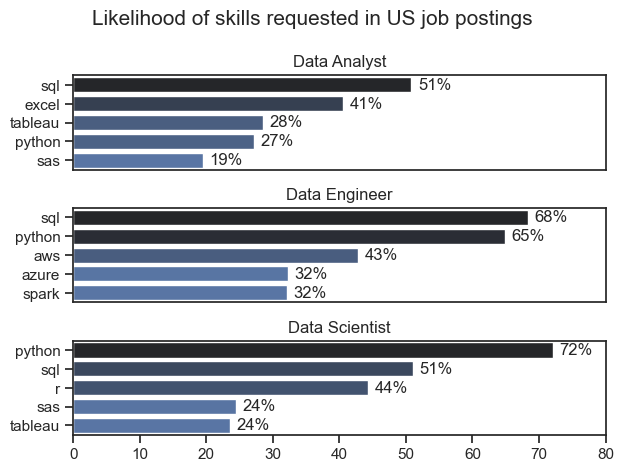

In [60]:
fig,ax=plt.subplots(len(job_titles),1)
sns.set_theme(style='ticks')

for i ,job_title in enumerate(job_titles):
  df_plot=df_skills_perc[df_skills_perc['job_title_short']== job_title].head(5)
  # df_plot.plot(kind='barh',x='job_skills',y='skill_percent',ax=ax[i],title=job_title)
  sns.barplot(data=df_plot,x='skill_percent',y='job_skills',ax=ax[i],hue='skill_count', palette='dark:b_r')
  ax[i].set_title(job_title)
  # ax[i].invert_yaxis()
  ax[i].set_ylabel('')
  ax[i].set_xlabel('')
  ax[i].legend().set_visible(False)
  ax[i].set_xlim(0,80)
  
  if i!=len(job_titles)-1:
    ax[i].set_xticks([])

  for n,value in enumerate(df_plot['skill_percent']):
    ax[i].text(value+1,n,f'{value:.0f}%',va='center')
    # print(n, value)


fig.suptitle('Likelihood of skills requested in US job postings',fontsize=15)
fig.tight_layout()
plt.show()


In [ ]:
# 